In [236]:
# RED WINE
# Epic 2 - importing necessary libraries
import numpy as np
import pandas as pd


# Reading CSV file
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')


# Epic 3: Data Wrangling
# print the first 10 and the last 10 records (use head() and tail() methods)
#display(red_wine.head(10))
#print(red_wine.tail(10))


#check the info and the shape (use info() and shape methods)
#print(red_wine.info)
#print(red_wine.shape)


# observe if there are missing values (use isna(), isnull()
#print(red_wine.isnull().values.sum())
#print(red_wine.isna().values.sum())


# check for Descriptive Statistics for both red and white wine datasets 
#print(red_wine.describe())


# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])





In [237]:
# White WINE
# Epic 2 - importing necessary libraries
import numpy as np
import pandas as pd


# Reading CSV file
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


# Epic 3: Data Wrangling
# print the first 10 and the last 10 records (use head() and tail() methods)
#print(white_wine.head(10))
#print(white_wine.tail(10))


#check the info and the shape (use info() and shape methods)
#print(white_wine.info)
#print(white_wine.shape)


# observe if there are missing values (use isna(), isnull()
#print(white_wine.isnull().values.sum())
#print(white_wine.isna().values.sum())


# check for Descriptive Statistics for both red and white wine datasets 
#print(white_wine.describe())


# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])





In [238]:
# Epic 3: Exploratory Analysis
pd.concat([red_wine.describe(), white_wine.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])

selected_columns_red_wine = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality'] 
selected_columns_white_wine = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality'] 

red_wine_desired = red_wine[selected_columns_red_wine]
white_wine_sdesired = white_wine[selected_columns_white_wine]

combined_stats = pd.concat([red_wine_desired.describe(), white_wine_sdesired.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])

combined_stats.round(2)

# 1. The mean value of volatile acidity seem to be higher in red wine as compared to white wine.
# 2. The mean value of total sulfur dioxide and residual sugar seem to be higher in white wine as compared to red wine.
# 3. The std value of total sulfur dioxide and residual sugar seem to be higher in white wine as compared to red wine.
# 4. The 25% value of total sulfur dioxide seem to be way higher in white wine as compared to red wine.
# 5. The 25% value of sulphates and volatile acidity seem to be higher in red wine as compared to white wine.
# 6. The 50% value of residual sugar and total sulfur dioxide seem to be higher in white wine as compared to red wine.
# 7. The 50% value of volatile acidity seem to be higher in red wine as compared to white wine.
# 8. The 75% value of residual sugar and total sulfur dioxide seem to be higher in white wine as compared to red wine.
# 9. The 75% value of volatile acidity seem to be higher in red wine as compared to white wine.
# 10. The max value of residual sugar and total sulfur dioxide seem to be higher in white wine as compared to red wine.



Red Wines Stats                                          \
       residual sugar total sulfur dioxide sulphates  alcohol   
count         1599.00              1599.00   1599.00  1599.00   
mean             2.54                46.47      0.66    10.42   
std              1.41                32.90      0.17     1.07   
min              0.90                 6.00      0.33     8.40   
25%              1.90                22.00      0.55     9.50   
50%              2.20                38.00      0.62    10.20   
75%              2.60                62.00      0.73    11.10   
max             15.50               289.00      2.00    14.90   

                                White Wines Stats                       \
      volatile acidity  quality    residual sugar total sulfur dioxide   
count          1599.00  1599.00           4898.00              4898.00   
mean              0.53     5.64              6.39               138.36   
std               0.18     0.81              5.07                42.50   
min               0.12     3.00              0.60                 9.00   
25%               0.39     5.00              1.70               108.00   
50%               0.52     6.00              5.20               134.00   
75%               0.64     6.00              9.90               167.00   
max               1.58     8.00             65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

([<matplotlib.patches.Wedge at 0x2915881fb50>,
 [Text(-0.7872560039826877, 0.7682629655223598, 'White Wine'),
  Text(0.7872559680177021, -0.7682630023764719, 'Red Wine')],
 [Text(-0.4294123658087387, 0.41905252664855985, '75.4%'),
  Text(0.42941234619147384, -0.41905254675080283, '24.6%')])

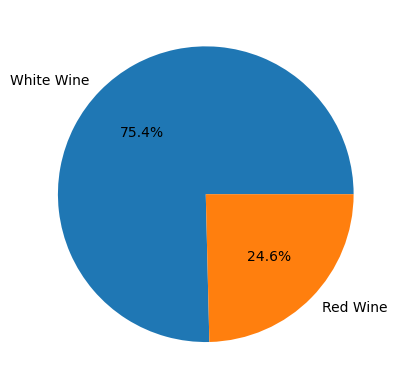

In [239]:
# The first plot you should do is a pie chart, showing the quantity of red wines compared to the quantity of white wines

import matplotlib.pyplot as plt
labels = 'White Wine', 'Red Wine'
sizes = [4898, 1599]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

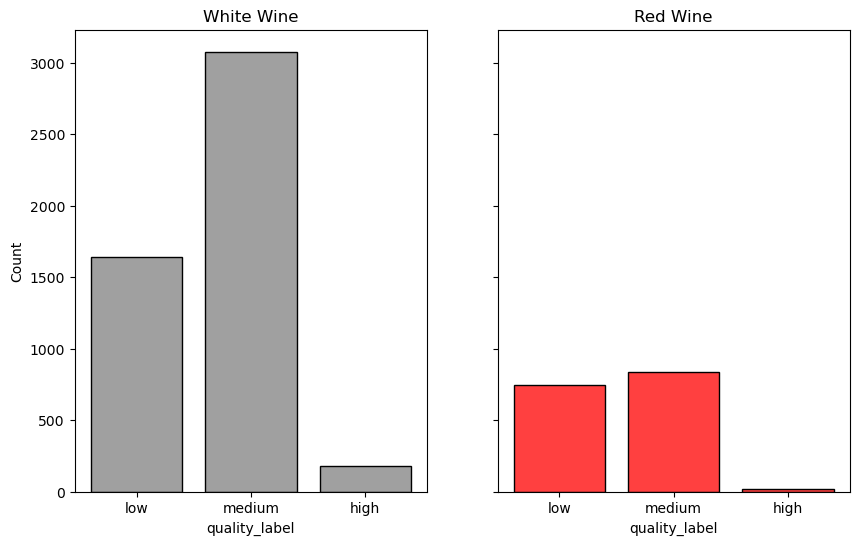

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


red_wine_new = red_wine.copy()
white_wine_new = white_wine.copy()


# 1 row, 2 columns, Y-axis is shared
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True) 


# the first histogram on the left subplot
sns.histplot(data=white_wine_new, x='quality_label', shrink=.8, multiple="dodge", color='grey', ax=axes[0])
axes[0].set_title('White Wine')


# the second histogram on the right subplot
sns.histplot(data=red_wine_new, x='quality_label', multiple="dodge", shrink=.8, color='red', ax=axes[1])
axes[1].set_title('Red Wine')


plt.show()



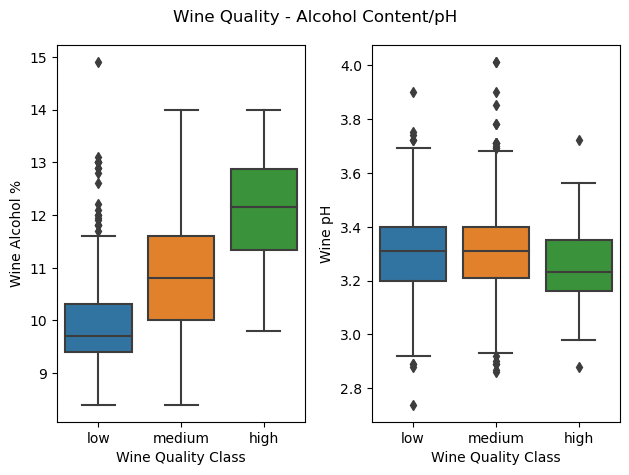

In [320]:
# Now try to compare the quality with some other features. For example, try reproducing the following box plot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


f, axes = plt.subplots(1, 2)


left_plot = sns.boxplot(y="alcohol", x= "quality_label", data=red_wine_new , orient='v', ax=axes[0])
left_plot.set_xlabel('Wine Quality Class')
left_plot.set_ylabel('Wine Alcohol %')


right_plot = sns.boxplot(y="pH", x= "quality_label", data=red_wine_new,  orient='v' , ax=axes[1])
right_plot.set_xlabel('Wine Quality Class')
right_plot.set_ylabel('Wine pH')


plt.suptitle('Wine Quality - Alcohol Content/pH', ha='center')


plt.tight_layout()
plt.show()




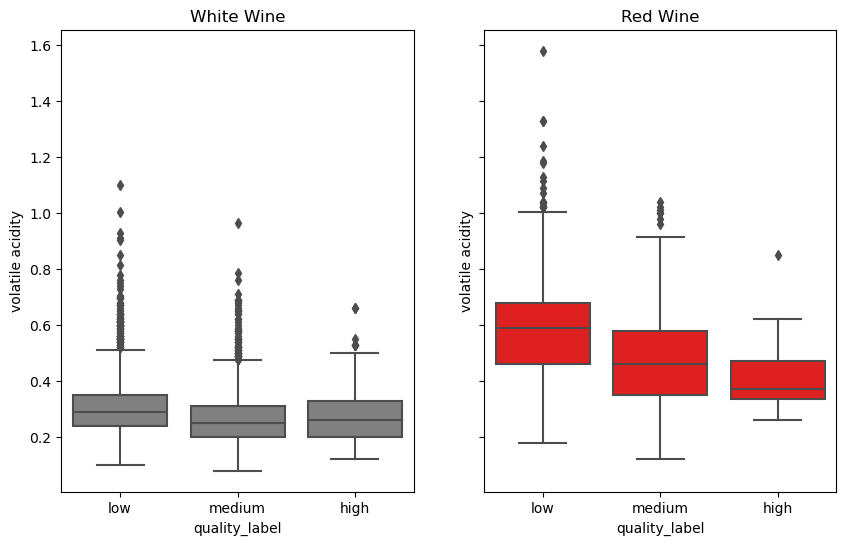

In [286]:
# 1. Wine Quality - volatile acidity

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1 row, 2 columns, Y-axis is shared
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True) 


# the first histogram on the left subplot
sns.boxplot(data=white_wine_new, x='quality_label', y='volatile acidity', color='grey', ax=axes[0])
axes[0].set_title('White Wine')


# the second histogram on the right subplot
sns.boxplot(data=red_wine_new, x='quality_label', y='volatile acidity', color='red', ax=axes[1])
axes[1].set_title('Red Wine')

# IMPORTANT: Or we can do it we lineplot, violinplot, barplot, boxplot (this one based on describe above)
# Decide which is better


plt.show()


Text(0.5, 1.0, 'Red Wine')

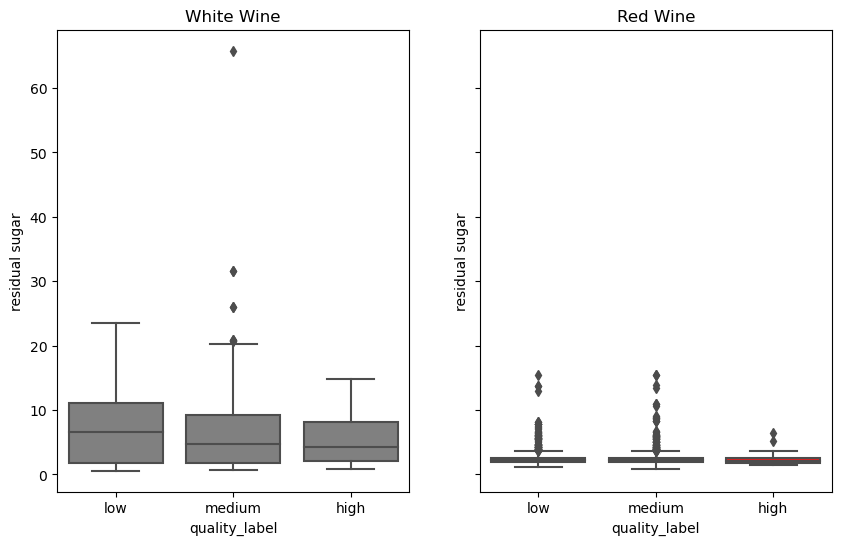

In [287]:
# 2. Wine Quality - residual sugar

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1 row, 2 columns, Y-axis is shared
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True) 


# the first histogram on the left subplot
sns.boxplot(data=white_wine_new, x='quality_label', y='residual sugar', color='grey', ax=axes[0])
axes[0].set_title('White Wine')


# the second histogram on the right subplot
sns.boxplot(data=red_wine_new, x='quality_label', y='residual sugar', color='red', ax=axes[1])
axes[1].set_title('Red Wine')

# IMPORTANT: Or we can do it we lineplot, boxplot (this one based on describe above)
# Decide which is better


plt.show()



Text(0.5, 1.0, 'Red Wine')

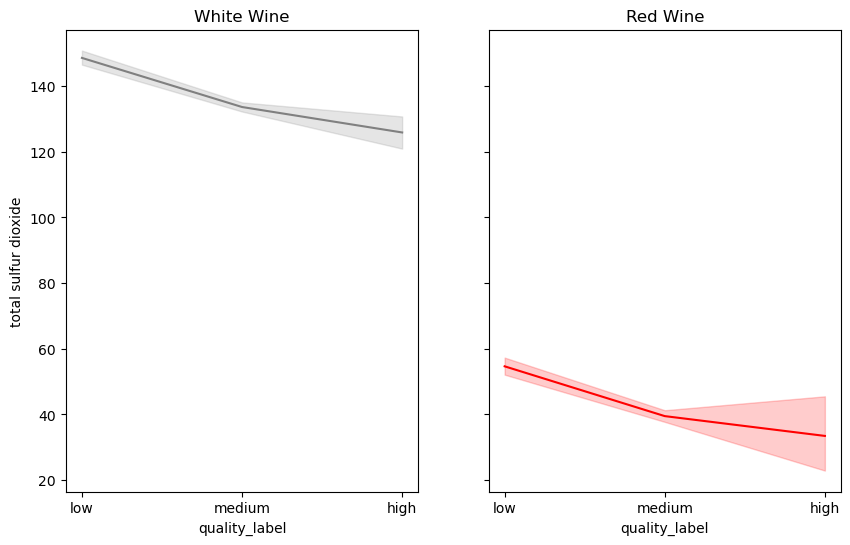

In [284]:
# 3. Wine Quality - total sulfur dioxide

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1 row, 2 columns, Y-axis is shared
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True) 


# the first histogram on the left subplot
sns.lineplot(data=white_wine_new, x='quality_label', y='total sulfur dioxide', color='grey', ax=axes[0])
axes[0].set_title('White Wine')


# the second histogram on the right subplot
sns.lineplot(data=red_wine_new, x='quality_label', y='total sulfur dioxide', color='red', ax=axes[1])
axes[1].set_title('Red Wine')

# IMPORTANT: Or we can do it we lineplot, boxplot (this one based on describe above)
# Decide which is better


plt.show()


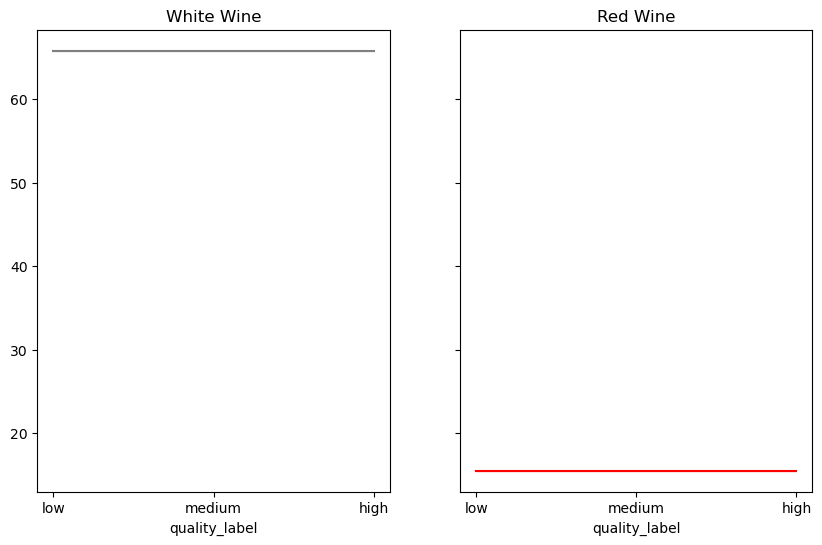

In [316]:
# 4. The max value of residual sugar and total sulfur dioxide seem to be higher in white wine as compared to red wine.



max_sugar_white = white_wine_new['residual sugar'].max()
max_sugar_red = red_wine_new['residual sugar'].max()


# 1 row, 2 columns, Y-axis is shared
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True) 


# the first histogram on the left subplot
sns.lineplot(data=white_wine_new, x='quality_label', y= max_sugar_white, color='grey', ax=axes[0])
axes[0].set_title('White Wine')


# the second histogram on the right subplot
sns.lineplot(data=red_wine_new, x='quality_label', y= max_sugar_red, color='red', ax=axes[1])
axes[1].set_title('Red Wine')


plt.show()

